# LOGISTIC REGRESSION

In [1]:
# Importing the libraries

import pandas as pd
import numpy as n
import matplotlib.pyplot as plt

In [2]:
# ingnoring warning

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading the dataset

df=pd.read_csv('CTG.csv')
df.head()

,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,Variab10.txt,12/1/1996,CTG0001.txt,240.0,357.0,120.0,120.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
1,Fmcs_1.txt,5/3/1996,CTG0002.txt,5.0,632.0,132.0,132.0,4.0,0.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
2,Fmcs_1.txt,5/3/1996,CTG0003.txt,177.0,779.0,133.0,133.0,2.0,0.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,Fmcs_1.txt,5/3/1996,CTG0004.txt,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,Fmcs_1.txt,5/3/1996,CTG0005.txt,533.0,1147.0,132.0,132.0,4.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0


In [4]:
# Shape

print('Shape: ',df.shape)

Shape:  (2129, 40)


### FUTURE ENGINEERING

In [5]:
# Checking removing null values

df.isnull().sum()

FileName    3
Date        3
SegFile     3
b           3
e           3
LBE         3
LB          3
AC          3
FM          2
UC          2
ASTV        2
MSTV        2
ALTV        2
MLTV        2
DL          1
DS          1
DP          1
DR          1
Width       3
Min         3
Max         3
Nmax        3
Nzeros      3
Mode        3
Mean        3
Median      3
Variance    3
Tendency    3
A           3
B           3
C           3
D           3
E           3
AD          3
DE          3
LD          3
FS          3
SUSP        3
CLASS       3
NSP         3
dtype: int64

In [6]:
# Removing null values

df.dropna(inplace=True)

df.isnull().sum()

FileName    0
Date        0
SegFile     0
b           0
e           0
LBE         0
LB          0
AC          0
FM          0
UC          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
DL          0
DS          0
DP          0
DR          0
Width       0
Min         0
Max         0
Nmax        0
Nzeros      0
Mode        0
Mean        0
Median      0
Variance    0
Tendency    0
A           0
B           0
C           0
D           0
E           0
AD          0
DE          0
LD          0
FS          0
SUSP        0
CLASS       0
NSP         0
dtype: int64

In [7]:
# Shape after replacing missing values


print('Shape: ',df.shape)

Shape:  (2126, 40)


In [8]:
# Checking duplicated values

df.duplicated().sum()

0

In [9]:
## Removing unwanted text column

df.drop(columns=['FileName','Date','SegFile'], inplace=True)

In [10]:
# Shape after Droping columns


print('Shape: ',df.shape)

Shape:  (2126, 37)


In [11]:
# Checking dtype

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2126 entries, 0 to 2125
Data columns (total 37 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   b         2126 non-null   float64
 1   e         2126 non-null   float64
 2   LBE       2126 non-null   float64
 3   LB        2126 non-null   float64
 4   AC        2126 non-null   float64
 5   FM        2126 non-null   float64
 6   UC        2126 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2126 non-null   float64
 11  DL        2126 non-null   float64
 12  DS        2126 non-null   float64
 13  DP        2126 non-null   float64
 14  DR        2126 non-null   float64
 15  Width     2126 non-null   float64
 16  Min       2126 non-null   float64
 17  Max       2126 non-null   float64
 18  Nmax      2126 non-null   float64
 19  Nzeros    2126 non-null   float64
 20  Mode      2126 non-null   floa

In [12]:
# Splitting the data into x and y ( input and output )

X=df.drop(columns='NSP', axis=1)
y=df.loc[:,'NSP']

In [13]:
# Shape of X and Y


print('Shape of X: ',X.shape)
print('Shape of Y: ', y.shape)

Shape of X:  (2126, 36)
Shape of Y:  (2126,)


In [14]:
# DF of X

X.head()

,b,e,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,...,B,C,D,E,AD,DE,LD,FS,SUSP,CLASS
0,240.0,357.0,120.0,120.0,0.0,0.0,0.0,73.0,0.5,43.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0
1,5.0,632.0,132.0,132.0,4.0,0.0,4.0,17.0,2.1,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0
2,177.0,779.0,133.0,133.0,2.0,0.0,5.0,16.0,2.1,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0
3,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,16.0,2.4,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0
4,533.0,1147.0,132.0,132.0,4.0,0.0,5.0,16.0,2.4,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [15]:
y.head()

0    2.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: NSP, dtype: float64

In [16]:
# Checking the dataset is balanced or not

df['NSP'].value_counts()

1.0    1655
2.0     295
3.0     176
Name: NSP, dtype: int64

In [17]:
# Since data is imbalanced
# Trying over sampling

X1=X.copy()
y1=y.copy()

from imblearn.over_sampling import RandomOverSampler

rs=RandomOverSampler()
X,y=rs.fit_resample(X,y)

In [18]:
# Shape after over sampling

print('Shape of X and y before Sampling:')
print('X: ',X1.shape)
print('Y: ',y1.shape)

print(" ")

print('Shape of X and y before Sampling:')
print('X: ',X.shape)
print('Y: ',y.shape)

Shape of X and y before Sampling:
X:  (2126, 36)
Y:  (2126,)
 
Shape of X and y before Sampling:
X:  (4965, 36)
Y:  (4965,)


In [19]:
# Since the no of columns is more
# we need to reduce it
# for this we are doing feature selection
# This feature selection methods tell which column is better

### Feature selection

In [20]:
# 1. Using Feature Importance technique

from sklearn.ensemble import ExtraTreesClassifier
tree=ExtraTreesClassifier()
tree.fit(X,y)

ExtraTreesClassifier()

In [21]:
print(tree.feature_importances_)

[0.00501633 0.00728597 0.00740105 0.0130301  0.01391131 0.0046312
 0.00791212 0.03628375 0.01524459 0.03655968 0.01333544 0.00847875
 0.00021499 0.03648511 0.         0.00842165 0.01350824 0.00616104
 0.00526736 0.0015682  0.01966856 0.02652142 0.02380059 0.01245662
 0.00798503 0.02806858 0.03961848 0.00127836 0.00399492 0.06497419
 0.02223837 0.01866598 0.11564053 0.09814012 0.13436499 0.14186638]


In [22]:
data=pd.Series(tree.feature_importances_)

In [23]:
data.index=X.columns

In [24]:
data

b           0.005016
e           0.007286
LBE         0.007401
LB          0.013030
AC          0.013911
FM          0.004631
UC          0.007912
ASTV        0.036284
MSTV        0.015245
ALTV        0.036560
MLTV        0.013335
DL          0.008479
DS          0.000215
DP          0.036485
DR          0.000000
Width       0.008422
Min         0.013508
Max         0.006161
Nmax        0.005267
Nzeros      0.001568
Mode        0.019669
Mean        0.026521
Median      0.023801
Variance    0.012457
Tendency    0.007985
A           0.028069
B           0.039618
C           0.001278
D           0.003995
E           0.064974
AD          0.022238
DE          0.018666
LD          0.115641
FS          0.098140
SUSP        0.134365
CLASS       0.141866
dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

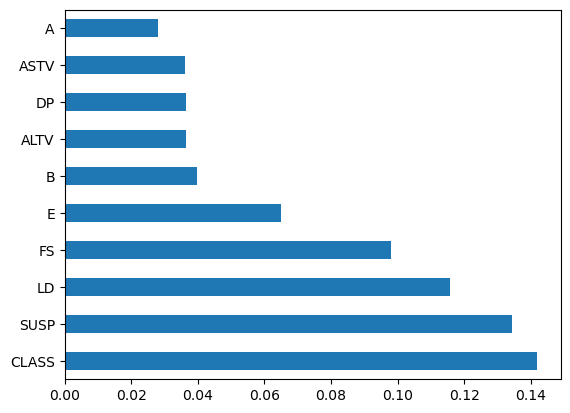

In [25]:
data.nlargest(10).plot(kind='barh')
plt.show

In [26]:
data.nlargest(10).index

Index(['CLASS', 'SUSP', 'LD', 'FS', 'E', 'B', 'ALTV', 'DP', 'ASTV', 'A'], dtype='object')

In [27]:
# Selecting only these columns

X1=X.copy()
y1=y.copy()

X=X[data.nlargest(10).index]

In [28]:
# Shape after feature selection

print('Shape of X and y before Sampling:')
print('X: ',X1.shape)
print('Y: ',y1.shape)

print(" ")

print('Shape of X and y before Sampling:')
print('X: ',X.shape)
print('Y: ',y.shape)

Shape of X and y before Sampling:
X:  (4965, 36)
Y:  (4965,)
 
Shape of X and y before Sampling:
X:  (4965, 10)
Y:  (4965,)


### MODEL DEPLOYMENT

In [29]:
### Train test split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3475, 10), (1490, 10), (3475,), (1490,))

In [30]:
# Logistic regression

from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [31]:
# y_predict

y_predict=lr.predict(X_test)

In [32]:
# metrics

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score

accuracy=accuracy_score(y_test,y_predict)
cr=classification_report(y_test,y_predict)
cm=confusion_matrix(y_test,y_predict)

print('accuracy: {}\n\n\nclassification report:\n {}\n\n\nconfusion matrix:\n {}'.format(accuracy*100,cr,cm))

accuracy: 97.0469798657718


classification report:
               precision    recall  f1-score   support

         1.0       0.95      0.98      0.96       520
         2.0       0.97      0.94      0.95       485
         3.0       0.99      0.99      0.99       485

    accuracy                           0.97      1490
   macro avg       0.97      0.97      0.97      1490
weighted avg       0.97      0.97      0.97      1490



confusion matrix:
 [[509  11   0]
 [ 27 455   3]
 [  0   3 482]]


Confusion matrix:
[[509  11   0]
 [ 27 455   3]
 [  0   3 482]]


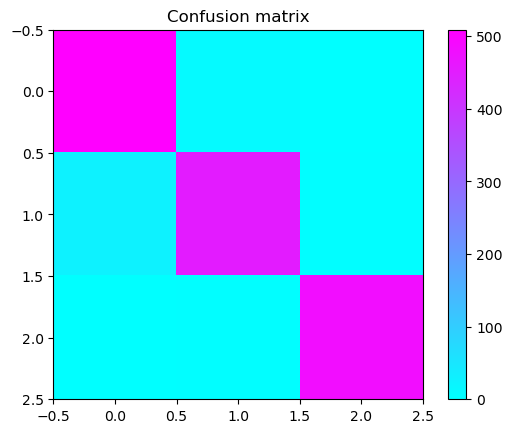

In [33]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.cool):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

cm1=confusion_matrix(y_test, y_predict)
print('Confusion matrix:')
print(cm)
plot_confusion_matrix(cm)